In [6]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Select specific file here (NOTE: change csv file here for cough/speech/breathing)
df_features = pd.read_csv("feats/breathing.csv")
df_features.shape

meta = pd.read_csv("data/metadata.csv")

labels_train = open("data/train_labels").readlines()
label_df = pd.DataFrame()
ids = []
label_list = []
for i in range(0, len(labels_train)):
    ids.append(labels_train[i][0:-3]) # 28 char of len
    if labels_train[i][-2:-1] == 'p':
        label_list.append(1) # c1 char of len
    elif labels_train[i][-2:-1] == 'n':
        label_list.append(0)

labels = open("data/test_labels").readlines()
for i in range(0, len(labels)):
    ids.append(labels[i][0:-3]) # 28 char of len
    if labels[i][-2:-1] == 'p':
        label_list.append(1) # c1 char of len
    elif labels[i][-2:-1] == 'n':
        label_list.append(0)

label_df['id'] = ids
label_df['target'] = label_list

# Getting features_meta data frame that includes all extracted features for chosen modality
features_meta = pd.DataFrame()
for i in range(0, len(ids)):
    junk = (df_features.loc[df_features['file_name'] == ids[i]])
    junk = junk.drop(columns=["Unnamed: 0"])
    junk['target'] = label_list[i]
    features_meta = features_meta.append(junk, ignore_index = True)


In [7]:
# Generalizing the process by first creating a test that gives the N distributions that are the most discriminative

# Initializing difference measure list
Zscores = list()

# Separating feature matrices to COVID and non-COVID
test_pos = features_meta[features_meta['target'] == 1]
test_neg = features_meta[features_meta['target'] == 0]

# Declaring number of distributions to view
Ndists = 50

# Now going through each feature and calculating the corresponding difference measure
curr_test_pos = pd.DataFrame
curr_test_neg = pd.DataFrame
for i in range(0,6373):
    curr_test_pos = test_pos.iloc[:,i]
    curr_test_neg = test_neg.iloc[:,i]
    mean_pos = curr_test_pos.mean()
    mean_neg = curr_test_neg.mean()
    std_pos = curr_test_pos.std()
    std_neg = curr_test_neg.std()
    Zscores.append( abs((mean_neg-mean_pos)/(math.sqrt(std_neg*std_neg + std_pos*std_pos))) )

# Sorting Z scores and keeping indices
Zindices = sorted(range(len(Zscores)), key=lambda k: Zscores[k],reverse=True)
Zsorted = sorted(Zscores, reverse=True)

# Using sorted indices to choose the N most discriminative features
best_feats = features_meta.iloc[:,Zindices[0:Ndists]]
best_feats.append(features_meta.iloc[:,6374])

,audSpec_Rfilt_sma_de[20]_peakMeanRel,audspecRasta_lengthL1norm_sma_de_peakMeanRel,audSpec_Rfilt_sma_de[15]_peakMeanRel,audSpec_Rfilt_sma_de[4]_peakMeanRel,audSpec_Rfilt_sma_de[22]_peakMeanRel,audSpec_Rfilt_sma_de[23]_peakMeanRel,audspec_lengthL1norm_sma_de_meanFallingSlope,audSpec_Rfilt_sma_de[19]_peakMeanRel,audSpec_Rfilt_sma_de[25]_peakMeanRel,audSpec_Rfilt_sma_de[18]_peakMeanRel,...,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410
0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.981345,20.000000,20.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-20.000000,-20.000000,-19.999985,-20.000000,-20.000000,-20.000000,3.268665,-20.000000,-20.000000,-20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,5.801519,20.000000,20.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,3.394047,-20.000000,-20.000000,-20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,12.885083,-20.000000,-20.000000,-20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,-20.000000,20.000000,20.000000,-20.000000,-20.000000,-20.000000,12.486996,20.000000,-20.000000,-20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1408,-19.999985,-20.000000,-19.997698,19.985466,-20.000000,-20.000000,2.289437,-19.999903,-19.999966,-19.998898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1409,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,3.448865,-20.000000,-20.000000,-20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410,19.990458,19.987164,19.986113,19.991583,19.976627,19.989004,5.094262,19.986668,19.991655,19.986294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


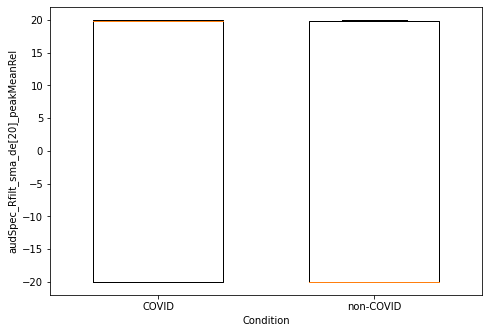

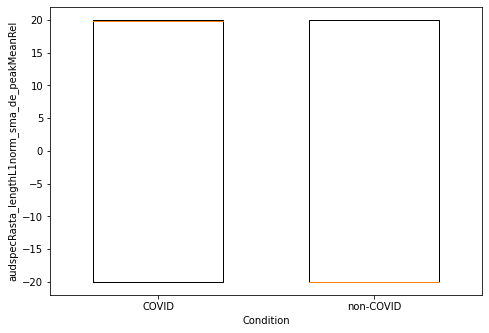

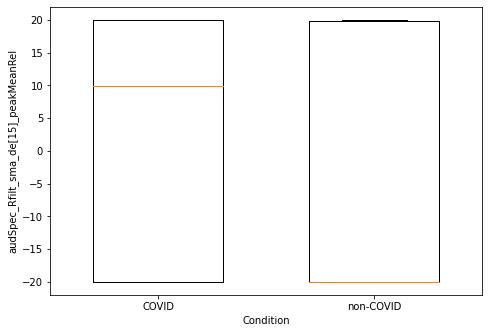

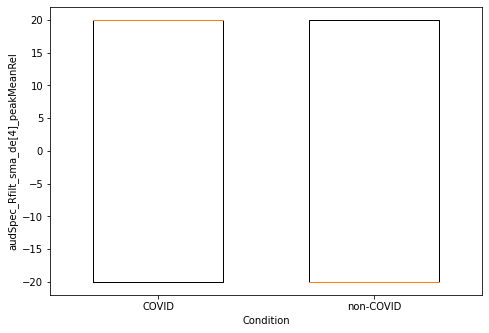

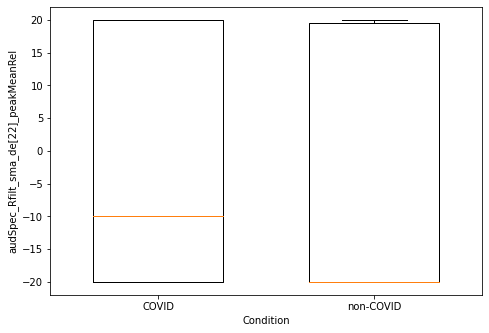

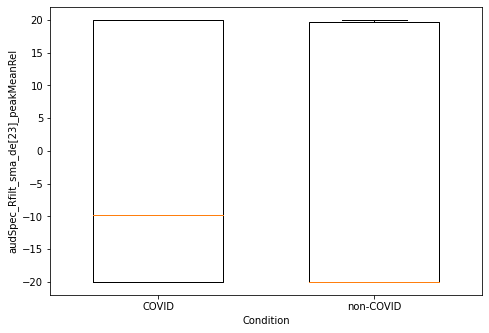

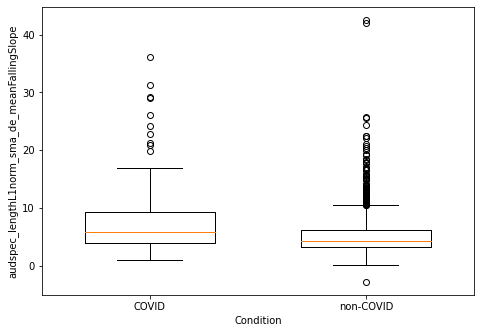

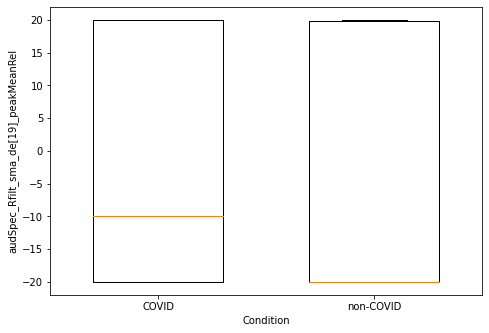

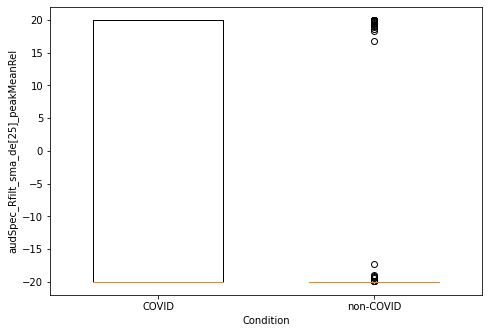

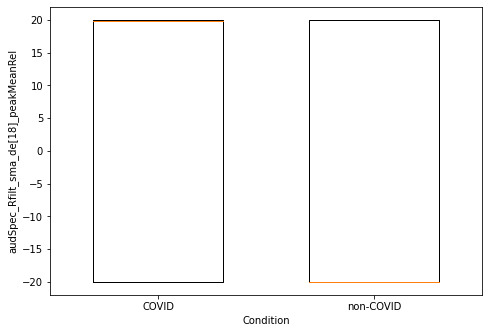

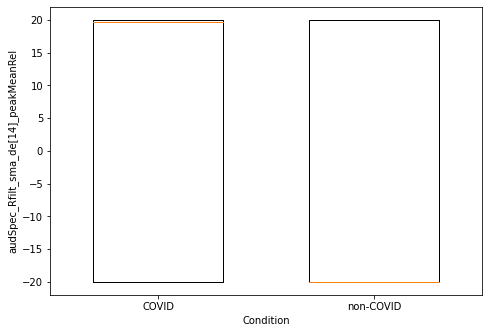

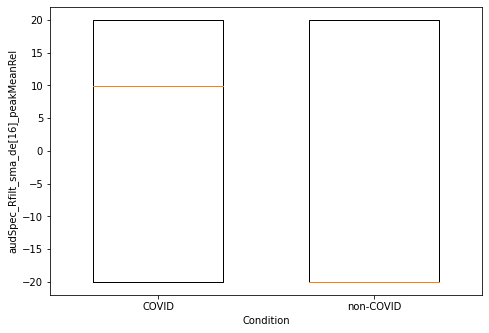

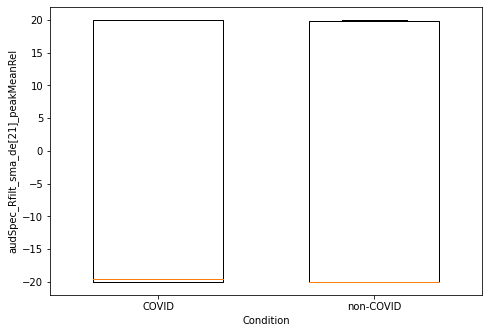

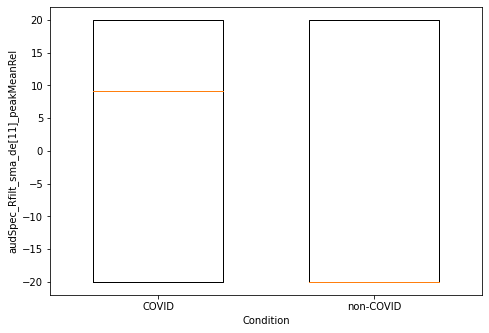

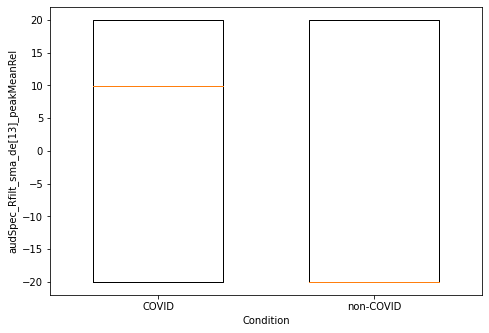

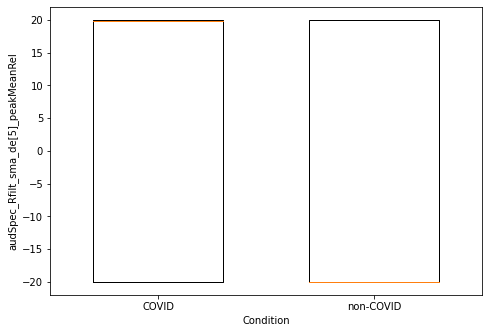

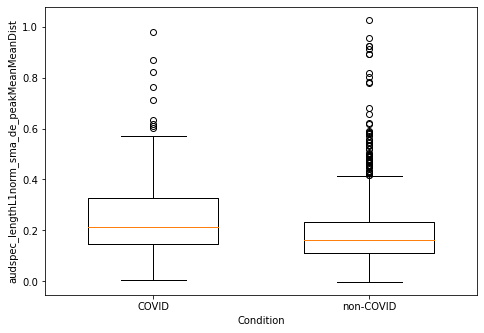

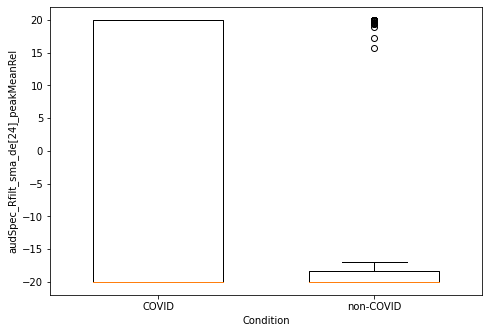

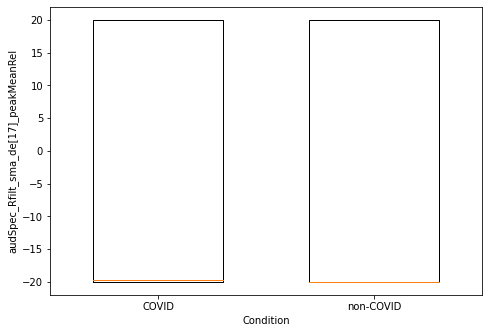

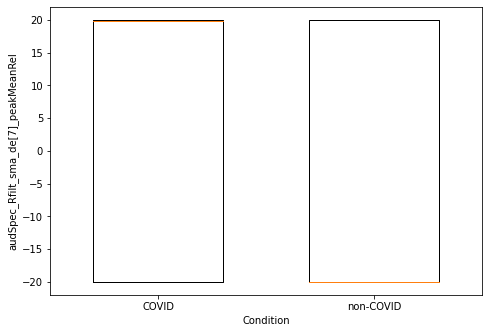

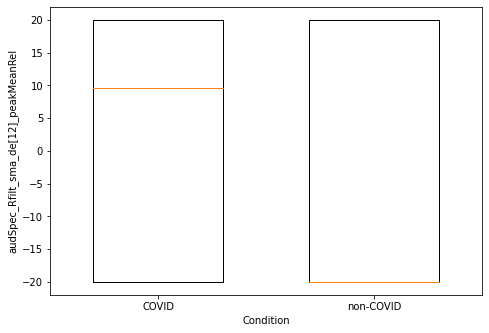

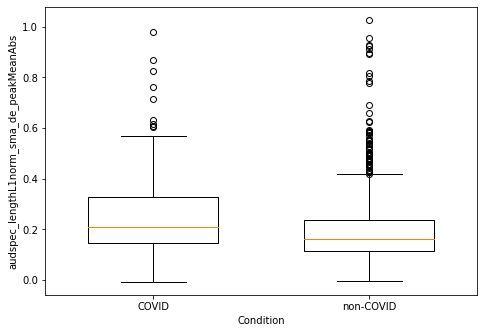

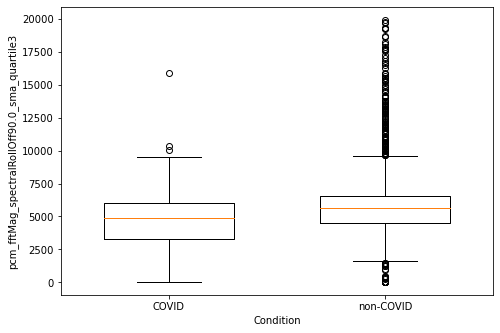

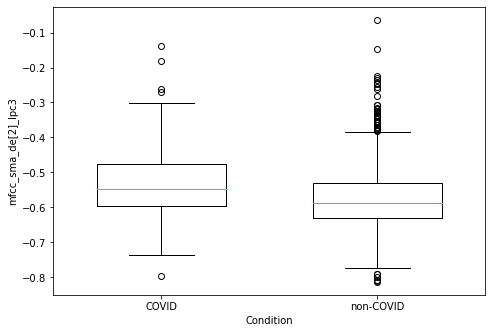

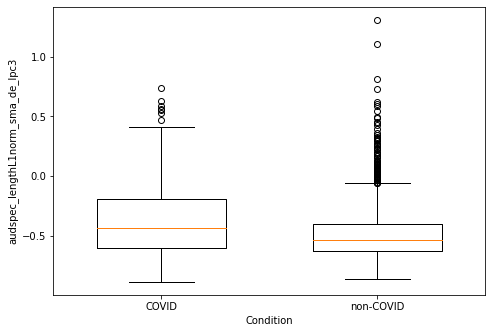

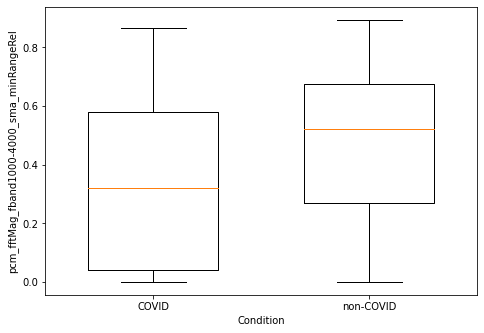

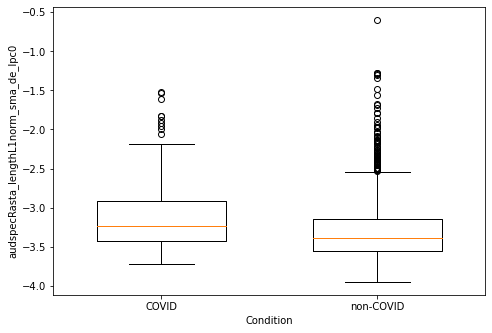

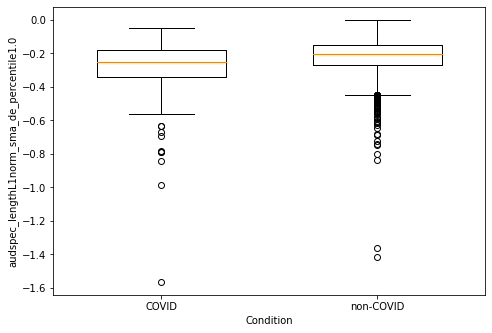

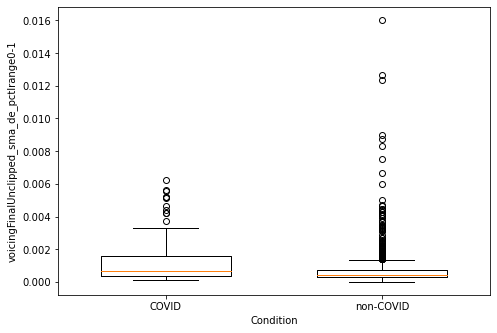

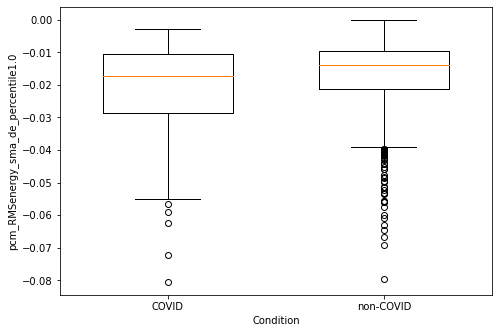

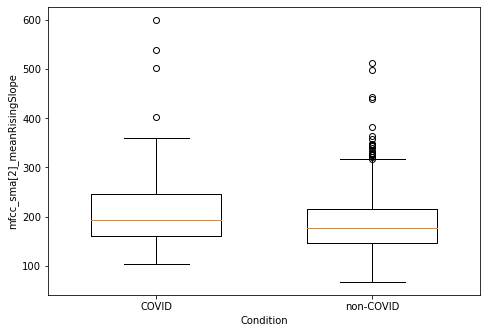

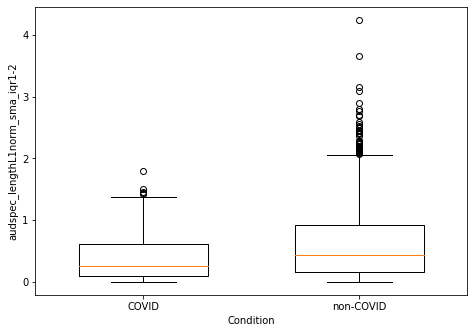

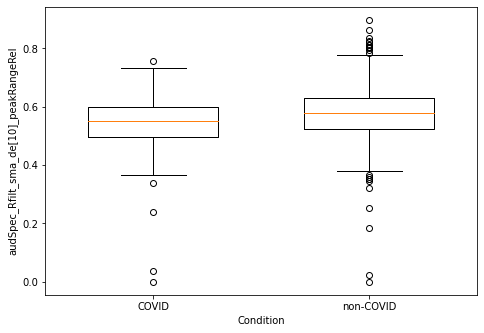

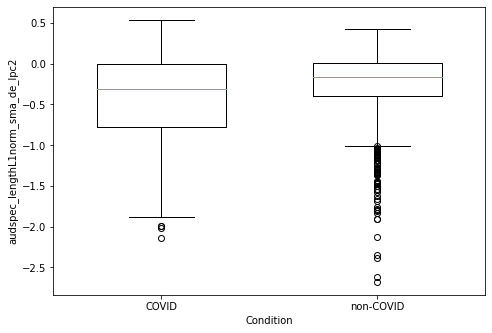

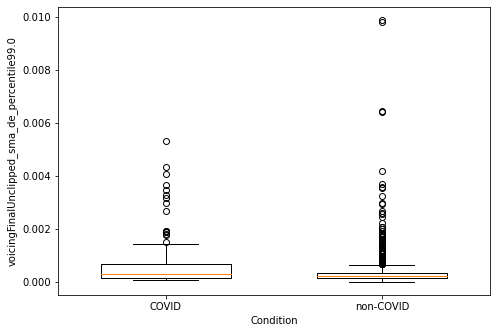

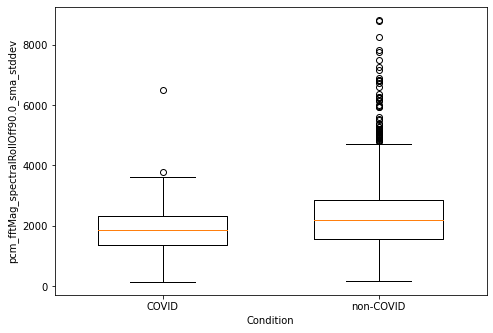

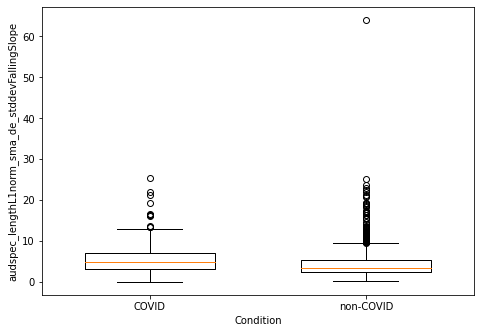

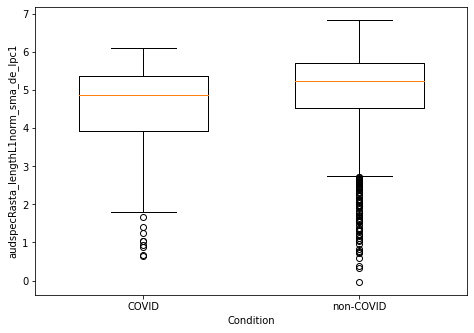

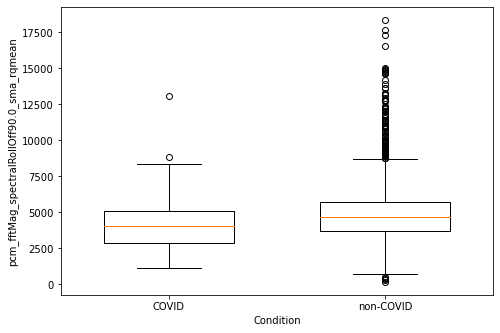

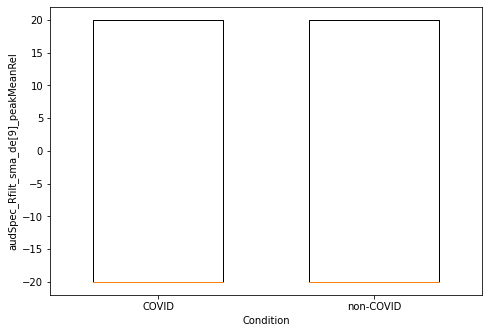

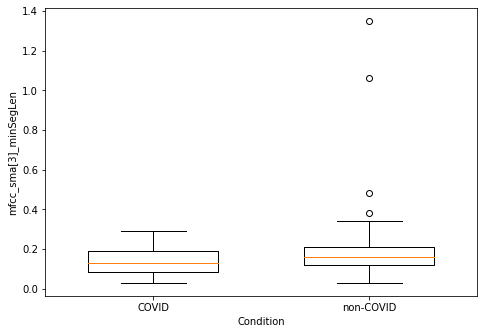

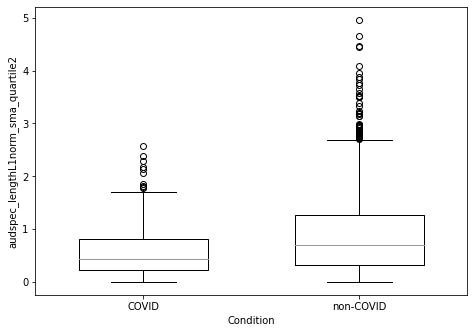

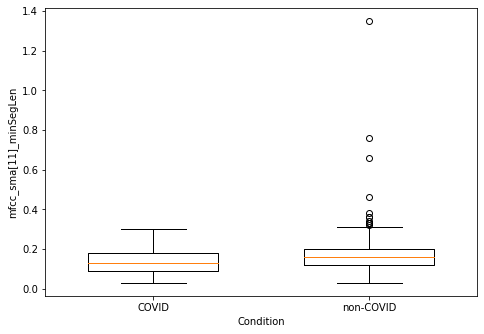

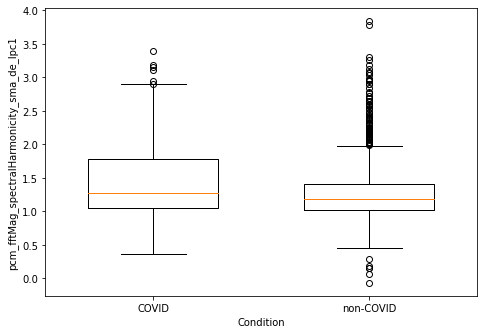

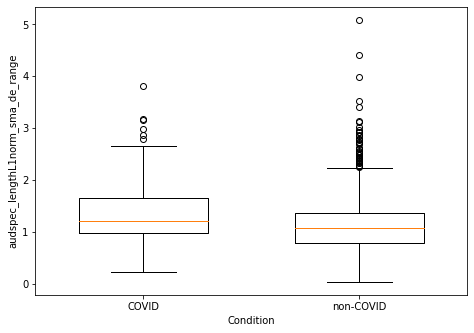

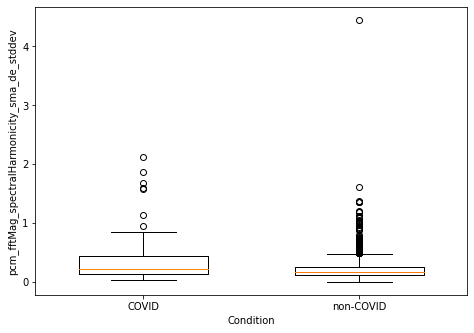

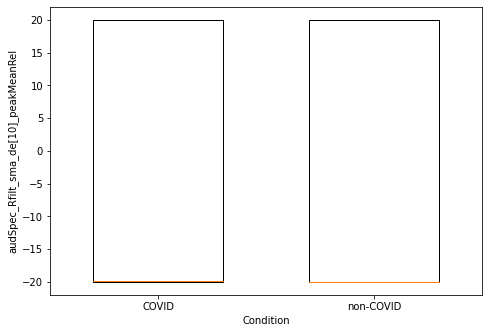

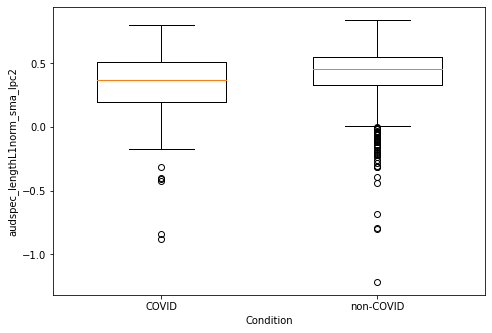

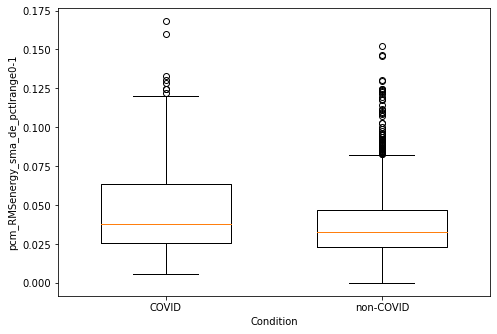

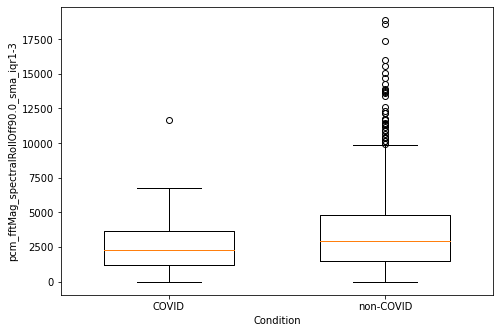

In [8]:
# Plotting Distributions for found features

# Beginning by splitting into COVID and non-COVID matrices
test_pos = best_feats[features_meta['target'] == 1]
test_neg = best_feats[features_meta['target'] == 0]

for i in range(0,Ndists):
    data = [test_pos.iloc[:,i],test_neg.iloc[:,i]]
    fig = plt.figure()

    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])

    # Creating plot
    bp = ax.boxplot(data,positions = [1, 2], widths = 0.6)
    plt.xticks([1, 2], ['COVID', 'non-COVID'])
    plt.xlabel("Condition")
    plt.ylabel(best_feats.columns[i])

    # show plot
    plt.show()

In [9]:
# Performing TSNE on full set of features and mapping

# Importing t-SNE and PCA libraries
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Performing t-SNE on all features
X = features_meta.to_numpy()
X.shape
X = X[:,0:6372]
feats_embedded = TSNE(n_components=2, learning_rate='auto', init='pca').fit_transform(X)
feats_embedded.shape


C:\Users\mblun\anaconda3\envs\asp\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(1411, 2)

No handles with labels found to put in legend.


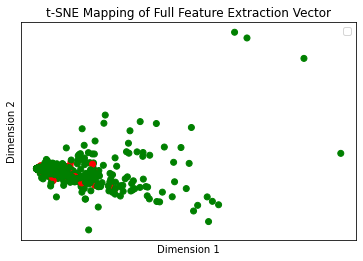

In [10]:
# Plotting t-SNE
df = pd.DataFrame(dict(dim1=feats_embedded[:,0], dim2=feats_embedded[:,1], covid=label_list))
fig, ax = plt.subplots()
colors = {0:'green', 1:'red'}
ax.scatter(df['dim1'], df['dim2'], c=df['covid'].map(colors))
ax.legend()
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Mapping of Full Feature Extraction Vector')
plt.show()